<a href="https://colab.research.google.com/github/BhaskarKumarSinha/Ml-Deep-Learning-AI-Projects/blob/main/MLProjects/Cracking_the_Code_An_Inside_Look_at_Netflixs_Content_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

In [ ]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.40 MiB | 5.07 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
netflix_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.shape

(7787, 12)

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


###Data Cleaning And Transformation

In [ ]:
netflix_df['director']=netflix_df['director'].fillna('Unknown')
netflix_df['cast']=netflix_df['cast'].fillna('Unknown')

netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
mode_country=netflix_df['country'].mode()[0]
netflix_df['country']=netflix_df['country'].fillna(mode_country)
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
# 3. Drop the few rows with missing 'date_added' and 'rating'
# Since the number is small (less than 0.2% of data), dropping them is a safe option.
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


##Now we filled the missing values and droped the row which has missing values because it present in less amount

Convert 'date_added' to datetime objects for time data analysis

In [ ]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'],format='mixed',dayfirst=False)
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


##Create a new feature for year and date

In [ ]:
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month


In [ ]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [ ]:
# Verify our cleaning and transformation
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


In [ ]:
netflix_df.head(2)
netflix_df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


##Data analysis and visualization

# Q1:What is distribution of content Type

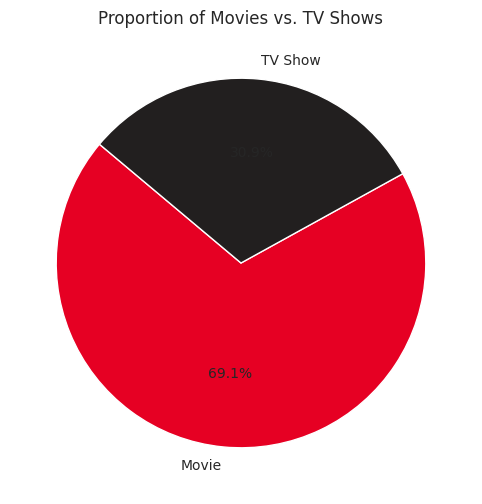

In [ ]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

##Q2:How has content been added over time?

<Figure size 1400x800 with 0 Axes>

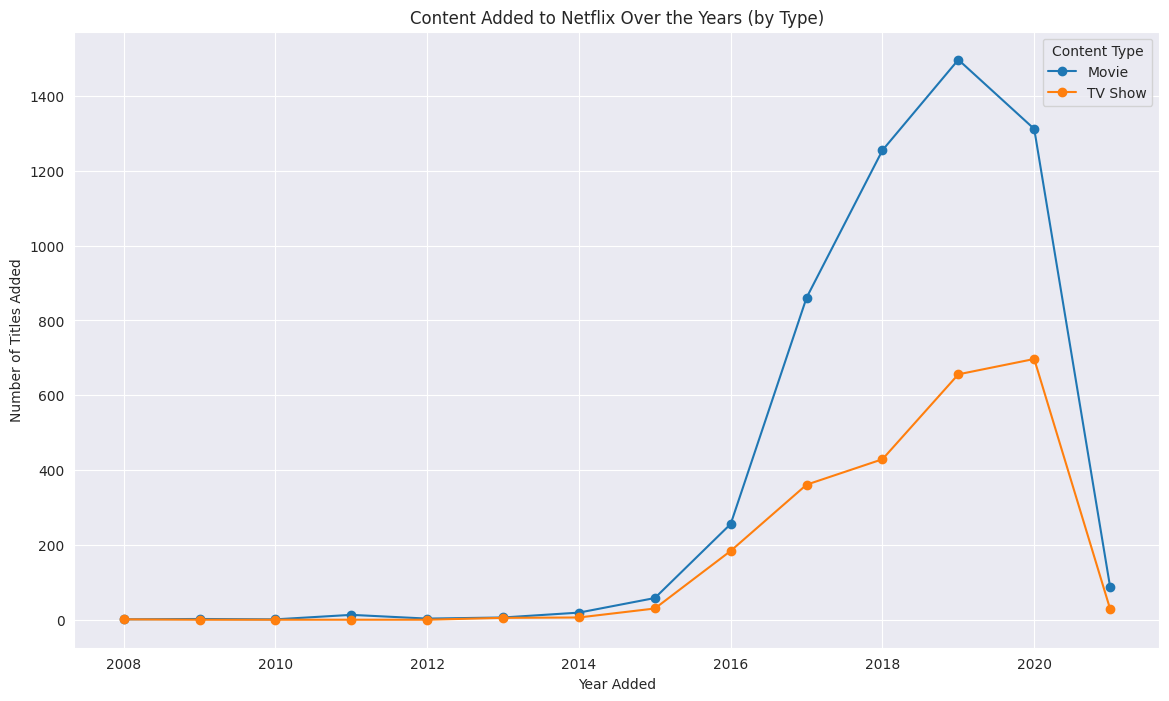

In [ ]:
content_over_time=netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)
plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

##Q3:What are the most popular genres?

In [ ]:
genres=netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')
genres

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Music & Musicals
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,International TV Shows
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Reality TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Documentaries


In [ ]:
genres['genre'].value_counts().reset_index()

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


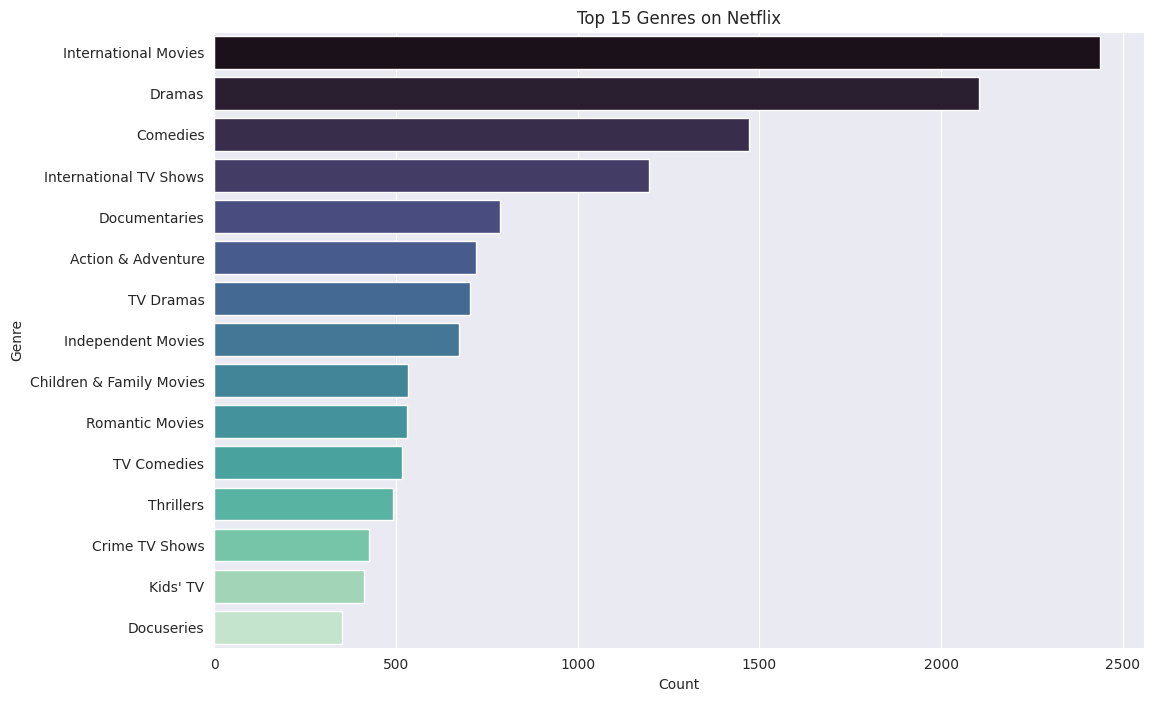

In [ ]:
top_genres_counts=genres['genre'].value_counts().reset_index()
top_genres_counts.columns=['genre','count']
#Top 15 Values
top_genres_counts_plot = top_genres_counts.head(15)
plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## Q4:What is the distribution of content duration?

In [ ]:
# Separate movies and TV shows
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [ ]:
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5372 entries, 1 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5372 non-null   object        
 1   type          5372 non-null   object        
 2   title         5372 non-null   object        
 3   director      5372 non-null   object        
 4   cast          5372 non-null   object        
 5   country       5372 non-null   object        
 6   date_added    5372 non-null   datetime64[ns]
 7   release_year  5372 non-null   int64         
 8   rating        5372 non-null   object        
 9   duration      5372 non-null   object        
 10  listed_in     5372 non-null   object        
 11  description   5372 non-null   object        
 12  year_added    5372 non-null   int32         
 13  month_added   5372 non-null   int32         
 14  duration_min  5372 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(2), o

In [ ]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

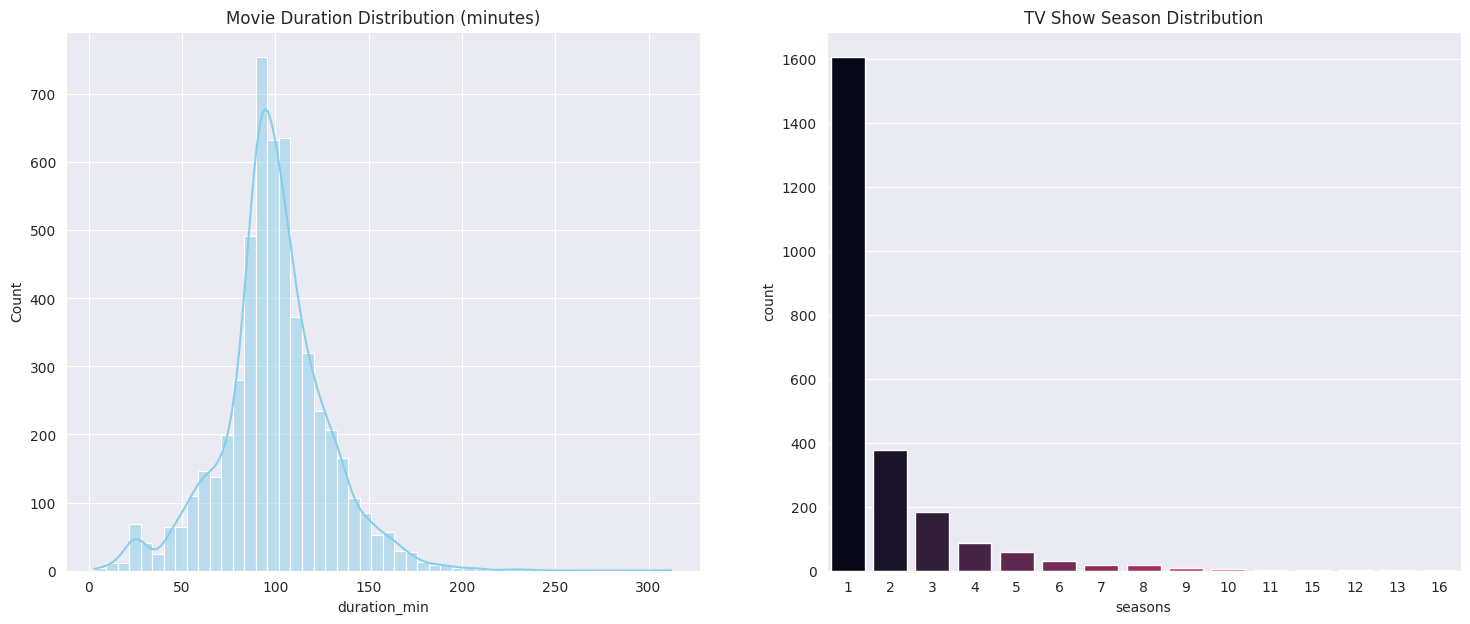

In [ ]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

##Q5:Where does the content come from? (Geographical Analysis)

In [ ]:
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [ ]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

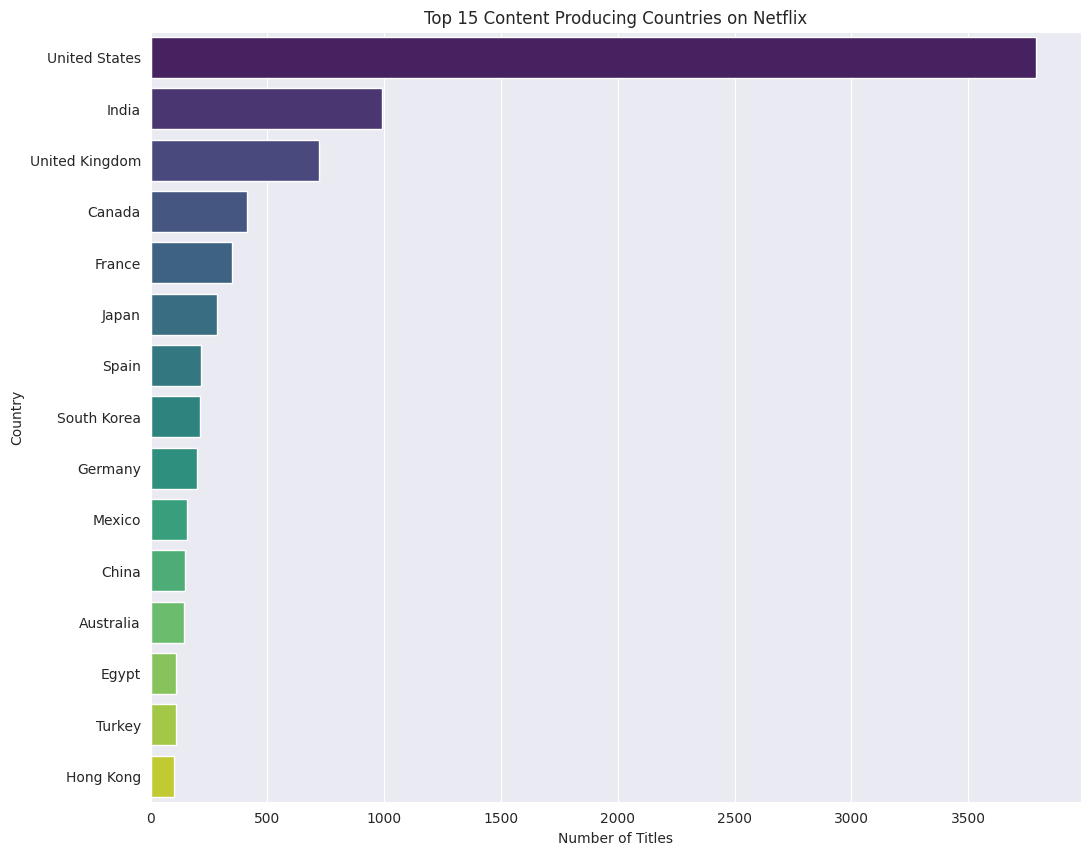

In [ ]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##Q6:What are the maturity ratings of the content?

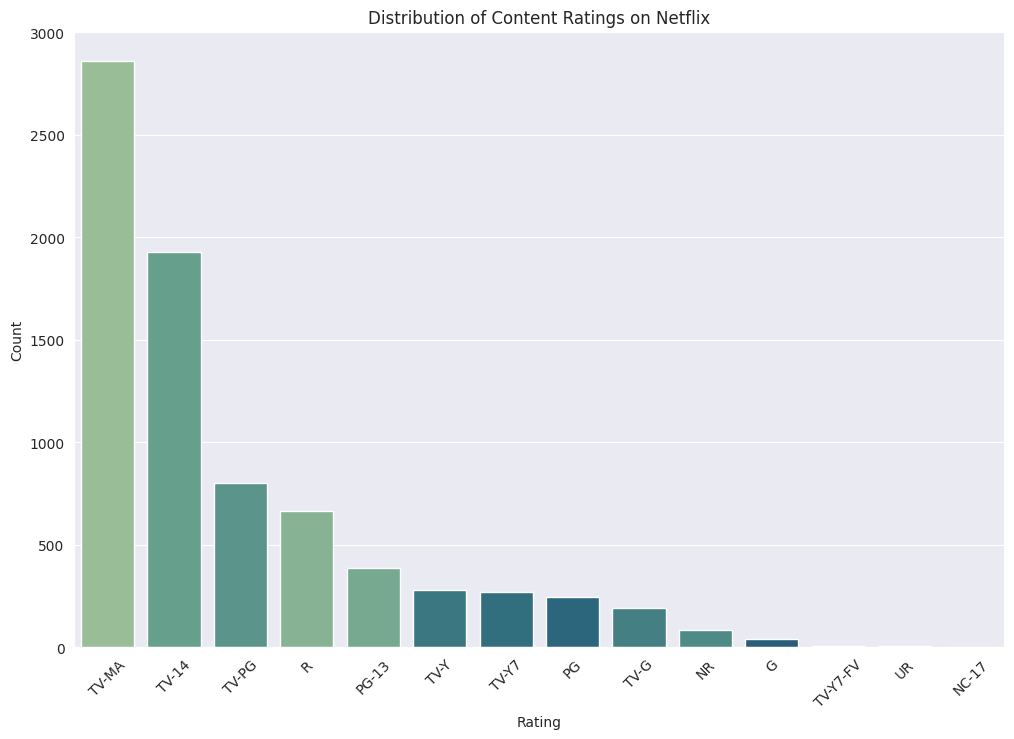

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Step 5: Feature Engineering - Content Freshness
####Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

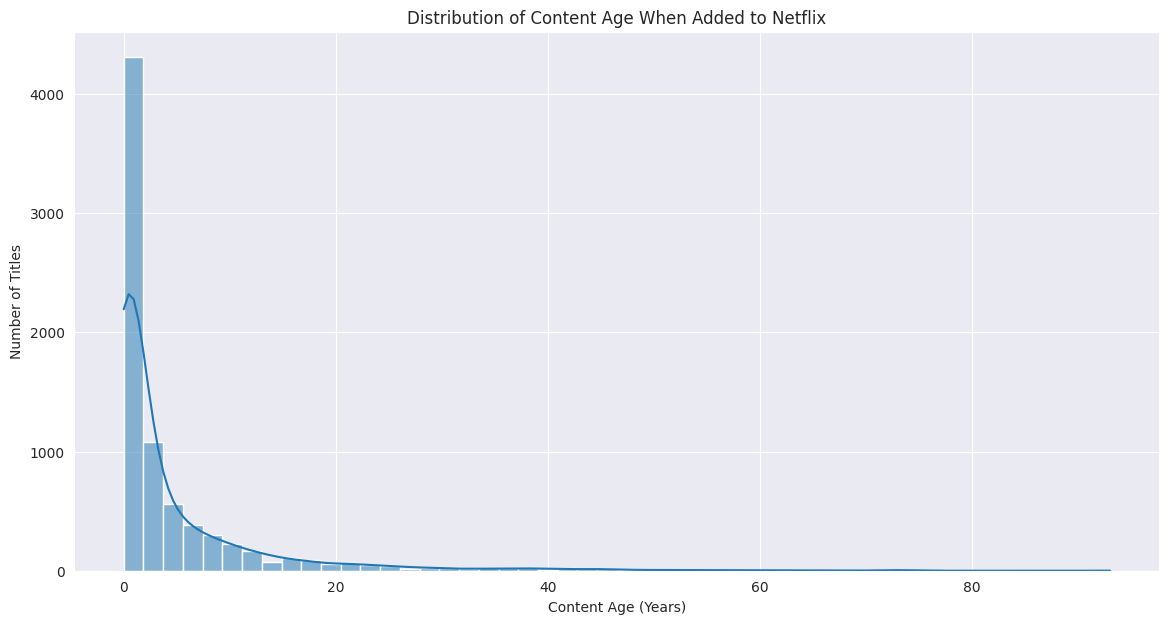

In [ ]:
# Create the 'age_on_netflix' feature
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

# Filter out any potential errors where added_year is before release_year
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

### Step 6: Deeper Multivariate Analysis

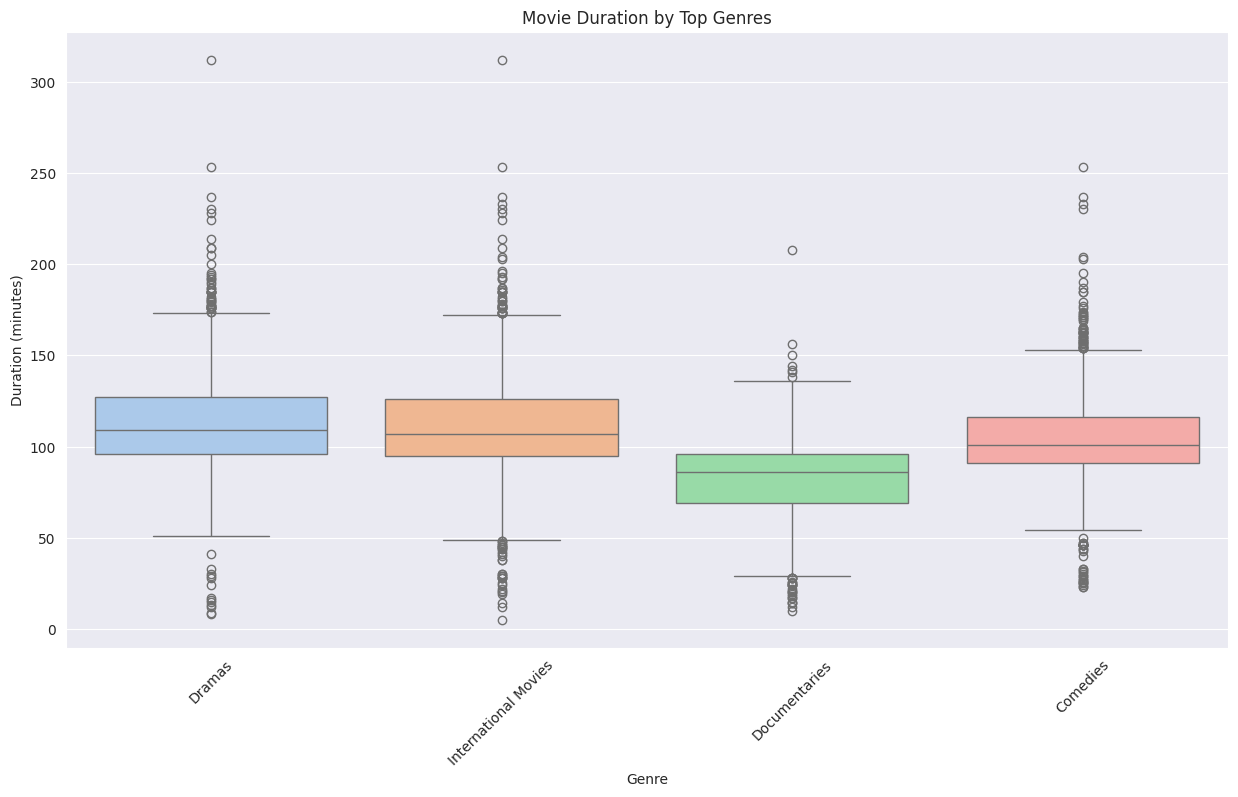

In [ ]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

## Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

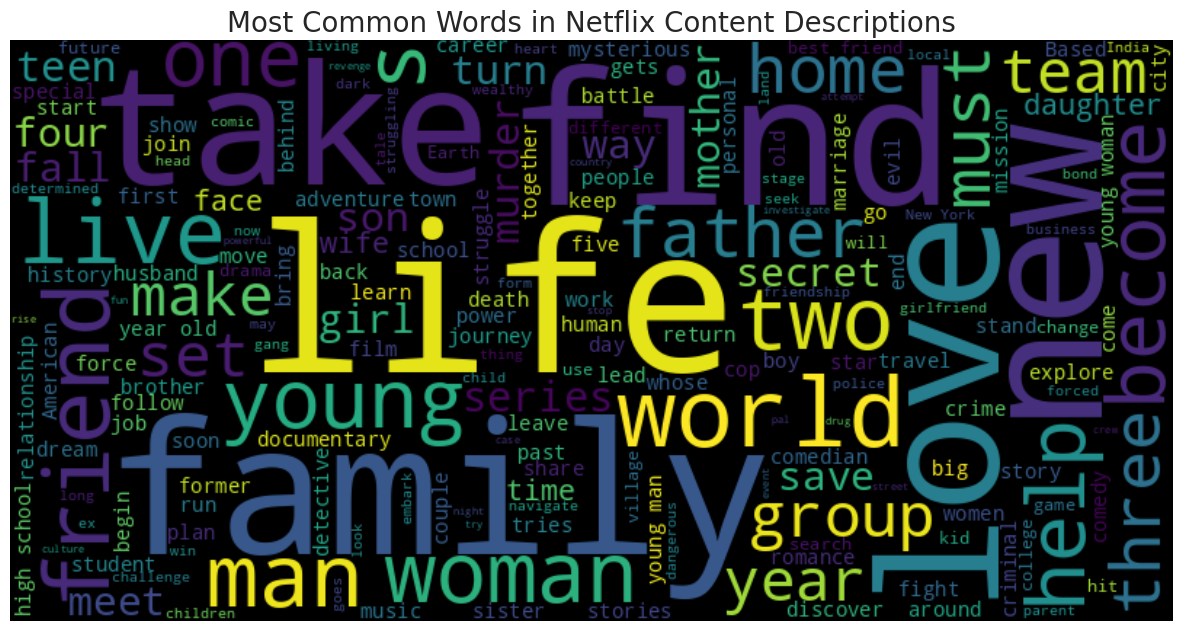

In [ ]:
# Combine all descriptions into a single string
text = ' '.join(netflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

In [ ]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0


In [ ]:
netflix_df.groupby(['year_added', 'rating']).size().unstack().fillna(0)

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
year_added,,,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,4.0,1.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0
2014,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,12.0,4.0,2.0,0.0,0.0,0.0
2015,1.0,0.0,5.0,2.0,2.0,3.0,15.0,8.0,29.0,8.0,8.0,5.0,2.0,0.0
2016,2.0,1.0,28.0,3.0,6.0,14.0,103.0,9.0,163.0,53.0,11.0,46.0,1.0,0.0


#Submission Questions

##Q1:How has the distribution of content ratings changed over time?

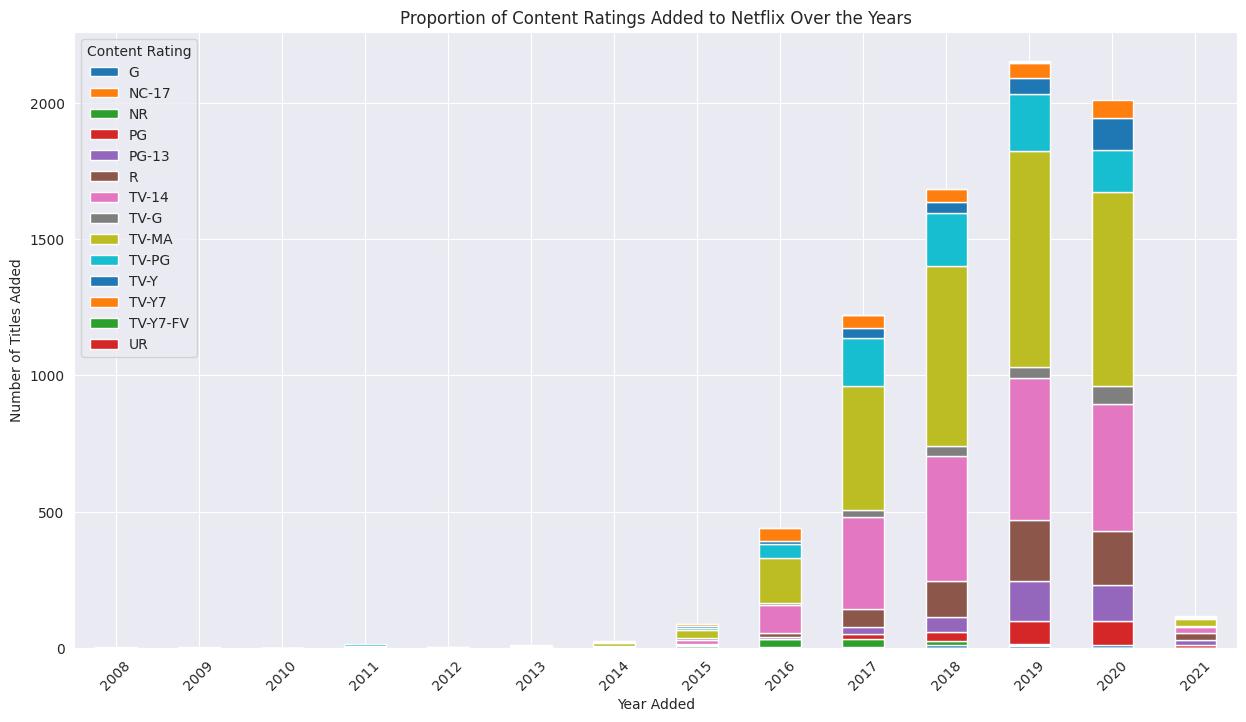

In [ ]:
# Create a stacked bar plot for content ratings added over the years
rating_over_time = netflix_df.groupby(['year_added', 'rating']).size().unstack().fillna(0)
rating_over_time.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Proportion of Content Ratings Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Rating')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

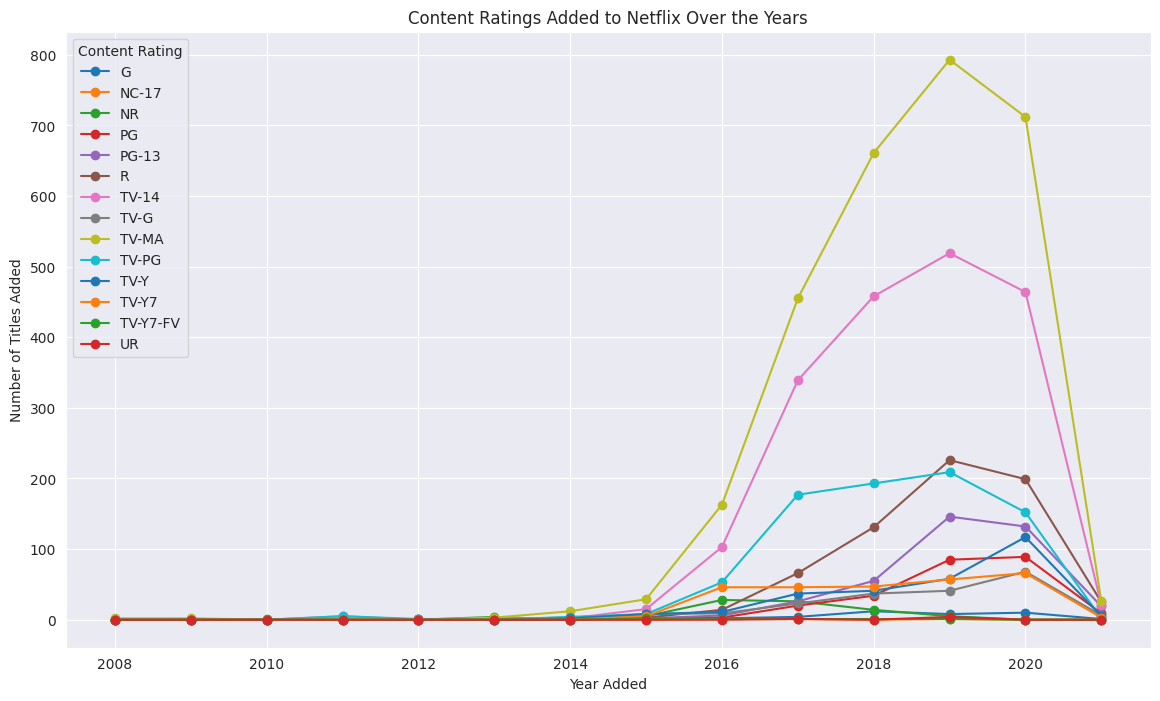

In [ ]:
# Group by year and rating and count the occurrences
rating_over_time = netflix_df.groupby(['year_added', 'rating']).size().unstack().fillna(0)

# Plot the results
plt.figure(figsize=(14, 8))
rating_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Ratings Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Rating')
plt.grid(True)
plt.show()

##Insights
####1. Overall Growth: There has been a significant increase in the number of titles added to Netflix across almost all rating categories, particularly between 2016 and 2020.
####2. Dominance of Mature Ratings: TV-MA and TV-14 ratings consistently represent the largest proportion of content added, indicating a focus on mature audiences.
####3. Increase in Kids' Content: There is a noticeable growth in content with ratings like TV-Y and TV-Y7 in recent years, suggesting an effort to expand content for younger viewers.
####4. Variety of Ratings: Netflix offers a wide range of content across various ratings, catering to different age groups and preferences.
####5. Peak in 2019/2020: The plots show a peak in the number of titles added around 2019 and 2020, followed by a decrease in 2021. This could be due to various factors, including production schedules or changes in acquisition strategy.


```
# This is formatted as code
```



##Q2:Is there a relationship between content age and its type (Movie vs. TV Show)?

In [ ]:
content_age

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,15
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,4
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,1
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,1


/tmp/ipython-input-2876565449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=content_age, x='type', y='age_on_netflix', palette='viridis')


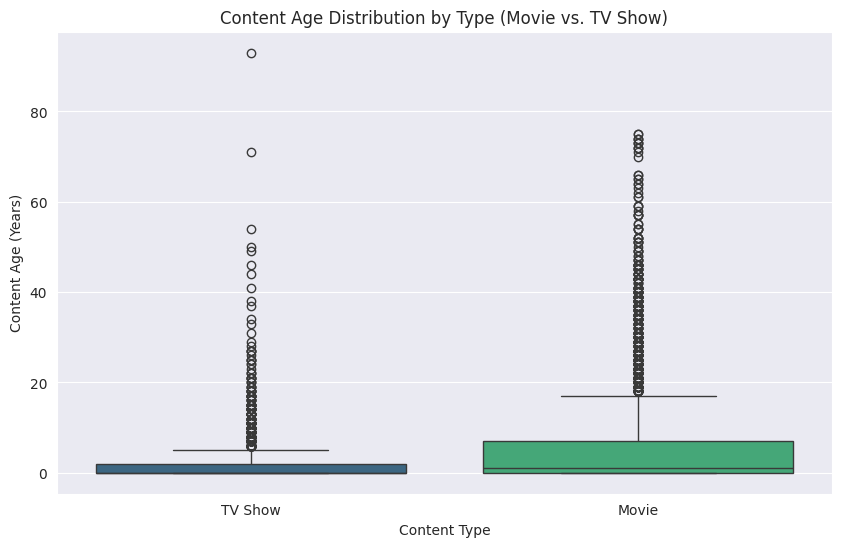

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=content_age, x='type', y='age_on_netflix', palette='viridis')
plt.title('Content Age Distribution by Type (Movie vs. TV Show)')
plt.xlabel('Content Type')
plt.ylabel('Content Age (Years)')
plt.show()

/tmp/ipython-input-3723378279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=content_age, x='type', y='age_on_netflix', palette='viridis')


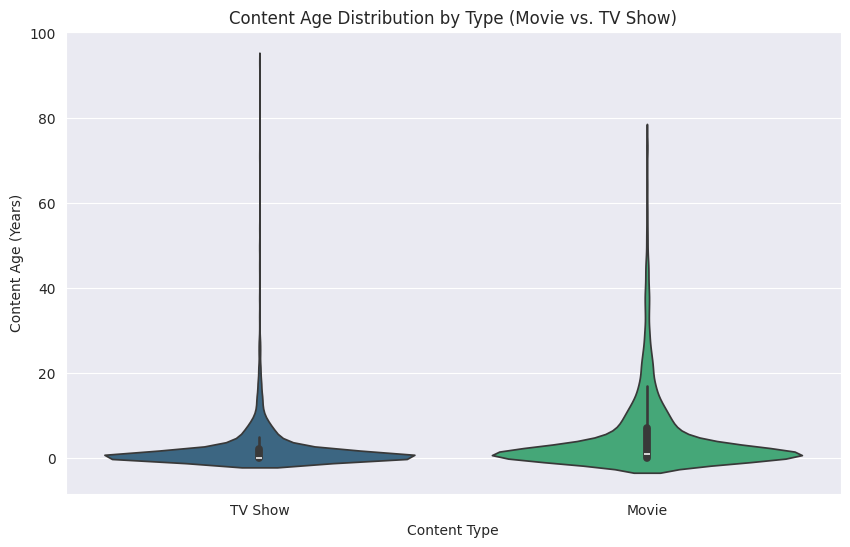

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=content_age, x='type', y='age_on_netflix', palette='viridis')
plt.title('Content Age Distribution by Type (Movie vs. TV Show)')
plt.xlabel('Content Type')
plt.ylabel('Content Age (Years)')
plt.show()

##Insight
####1. Shape of Distributions: The violin plot clearly shows that the distribution of content age for movies is wider and flatter, especially towards older ages, while the distribution for TV shows is narrower and more concentrated towards younger ages (closer to 0). This reinforces the observation from the box plot that movies tend to be older when added to Netflix compared to TV shows.
####2. Concentration of Newer Content: The thicker section at the lower end of the violin for TV shows indicates that a large proportion of TV shows added to Netflix are relatively new (low age on Netflix).
####3. Presence of Older Movies: The wider spread and smaller bumps in the violin for movies at higher ages suggest that while most movies added are relatively new, there's a significant number of older movies in the Netflix library.
####4. Outliers: The plot also visually highlights the outliers, which are the individual points extending far from the main body of the violin. These represent exceptionally old movies or TV shows added to Netflix.

##Q3:Can we identify any trends in content production based on the release year vs. the year added to Netflix?

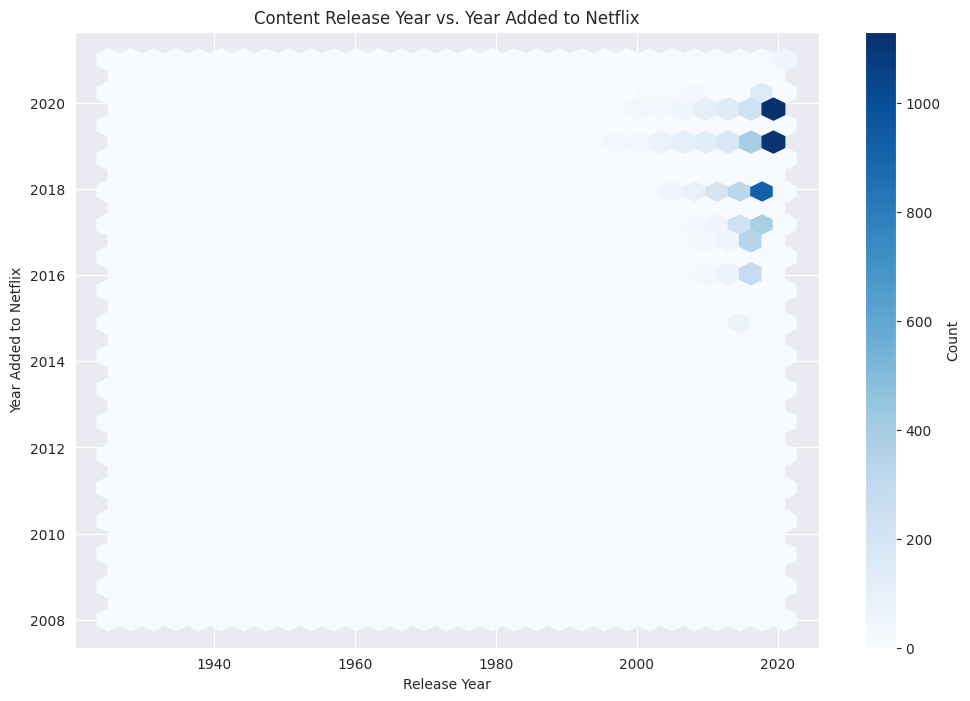

In [ ]:
plt.figure(figsize=(12, 8))
plt.hexbin(netflix_df['release_year'], netflix_df['year_added'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Content Release Year vs. Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.show()

##Insights
#####1.Diagonal Concentration (Recent Content): The most prominent feature is the dense concentration of hexagons along or near the diagonal line where the "Release Year" is close to the "Year Added to Netflix". This indicates that a significant portion of the content added to Netflix is relatively new, often released in the same year or a few years prior to being added to the platform. This highlights Netflix's strategy of acquiring and releasing recent movies and TV shows.
#####2. Vertical Streaks (Library Content Acquisition): You can also observe some vertical streaks of hexagons, particularly in later "Year Added to Netflix" years, extending downwards to older "Release Year" values. These streaks represent instances where Netflix added a batch of older content (library titles) in a specific year. This suggests that Netflix not only focuses on recent releases but also acquires older content to enrich its library.
#####3. Increasing Volume Over Time: The increasing density of hexagons as you move towards the bottom right of the plot (later "Year Added to Netflix" and "Release Year") visually confirms the overall growth in the amount of content added to Netflix over the years, which we also saw in the content added over time plot.
#####4. Absence of Content Added Before Release: As expected, there are no hexagons below the diagonal line, as content cannot be added to Netflix before it is released.
These trends suggest a dual strategy by Netflix: consistently adding recent content to keep the platform fresh and relevant, while also acquiring older library titles to provide a wider variety of options for subscribers.

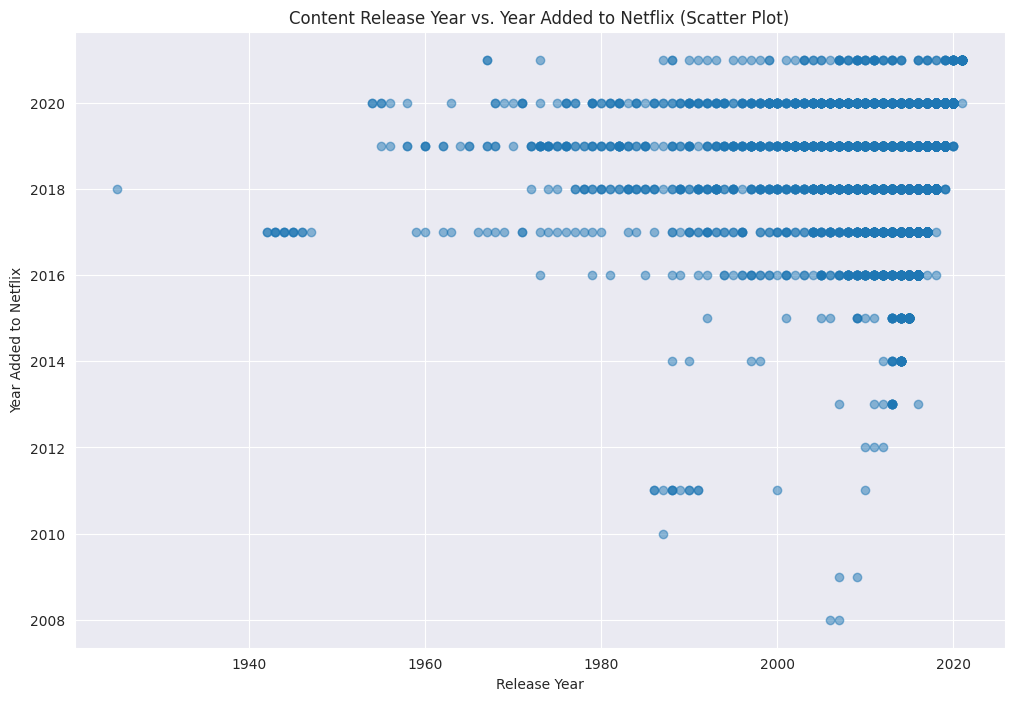

In [ ]:
# Scatter plot of Release Year vs. Year Added
plt.figure(figsize=(12, 8))
plt.scatter(netflix_df['release_year'], netflix_df['year_added'], alpha=0.5)
plt.title('Content Release Year vs. Year Added to Netflix (Scatter Plot)')
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.grid(True)
plt.show()

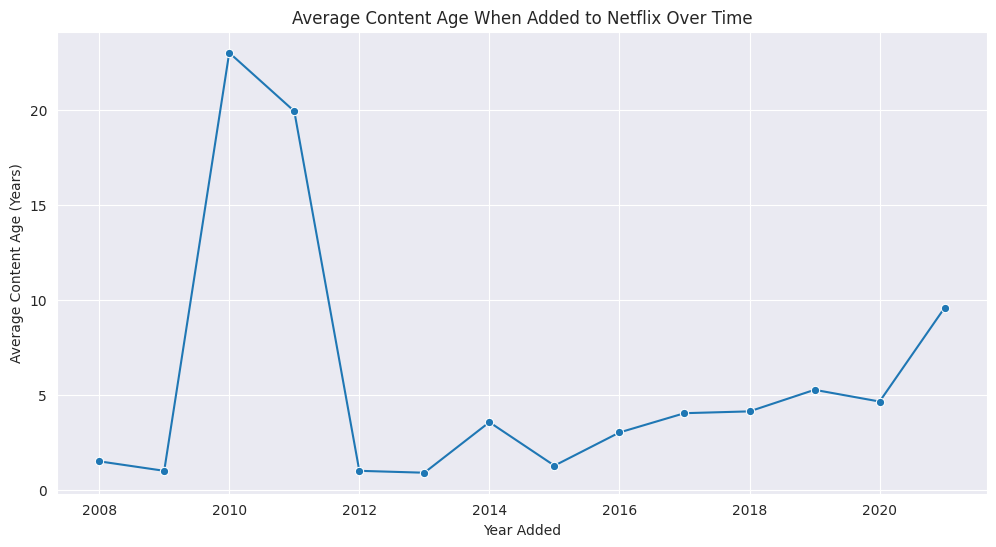

In [ ]:
# Calculate average content age per year added
average_age_per_year = content_age.groupby('year_added')['age_on_netflix'].mean().reset_index()

# Line plot of average content age over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_age_per_year, x='year_added', y='age_on_netflix', marker='o')
plt.title('Average Content Age When Added to Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Content Age (Years)')
plt.grid(True)
plt.show()

###Scatter Plot of Content Release Year vs. Year Added to Netflix:

######1. Visual Confirmation of Recent Content: This plot visually confirms the trend seen in the hexbin plot – a strong concentration of points where the release year is close to the year added, especially in more recent years. This indicates Netflix primarily adds content that was released recently.
#####2.Outliers and Older Content: The scatter plot clearly shows individual data points that represent older content (lower release years) added in later years. These are the library titles Netflix acquires to diversify its offerings. You can see distinct horizontal lines of points, which represent a batch of content from a specific release year being added across several later years.
#####5. Growth Over Time: The increasing density of points as you move towards the top right of the plot (later release years and later added years) again illustrates the overall growth in the volume of content added to Netflix.


###Line Plot of Average Content Age When Added to Netflix Over Time:

#####1. Fluctuations in Average Age: This plot shows that the average age of content added to Netflix has fluctuated over the years. There might be spikes in certain years, possibly due to the acquisition of large libraries of older content.
#####2. General Trend: While there are fluctuations, the plot can reveal a general trend in whether Netflix is consistently adding newer content or incorporating more older titles over time. The plot seems to indicate a dip in average age between 2012 and 2016, followed by an increase until 2021.
#####3. Impact of Library Deals: The significant jump in average content age around 2010-2011 could be an indicator of a major deal where Netflix acquired a large catalog of older titles.
#####4. These plots provide different perspectives on Netflix's content strategy, showing the balance between adding fresh releases and enriching their library with older content.

##Q4:What are the most common word pairs or phrases in content descriptions?

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources if not already downloaded
try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


# Function to clean text
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers
    tokens = word_tokenize(text) # Tokenize
    cleaned_text = [word for word in tokens if word not in stopwords and len(word) > 1] # Remove stop words and single characters
    return ' '.join(cleaned_text)

# Apply cleaning to the description column
netflix_df['cleaned_description'] = netflix_df['description'].apply(clean_text)

print("Original Description:")
print(netflix_df['description'].head())
print("\nCleaned Description:")
print(netflix_df['cleaned_description'].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Original Description:
0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

Cleaned Description:
0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: cleaned_description, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(stop_words=None, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 20 bigrams
top_bigrams = get_top_ngrams(netflix_df['cleaned_description'], n=20, ngram_range=(2, 2))

# Get top 20 trigrams
top_trigrams = get_top_ngrams(netflix_df['cleaned_description'], n=20, ngram_range=(3, 3))

print("Top 20 Bigrams:")
for phrase, freq in top_bigrams:
    print(f"{phrase}: {freq}")

print("\nTop 20 Trigrams:")
for phrase, freq in top_trigrams:
    print(f"{phrase}: {freq}")

Top 20 Bigrams:
high school: 128
young man: 101
young woman: 90
new york: 82
best friends: 52
true story: 48
standup special: 48
world war: 44
best friend: 43
based true: 42
documentary follows: 38
los angeles: 37
falls love: 37
war ii: 36
around world: 35
documentary series: 35
york city: 33
road trip: 32
serial killer: 31
two young: 28

Top 20 Trigrams:
world war ii: 34
new york city: 33
based true story: 25
based true events: 16
must find way: 9
dreams come true: 8
inspired true events: 8
life turned upside: 7
must decide whether: 7
high school student: 6
high school senior: 6
go behind scenes: 6
based real events: 6
high school students: 5
two young women: 5
saturday night live: 5
travels back time: 5
young man finds: 5
high school seniors: 5
one last job: 5


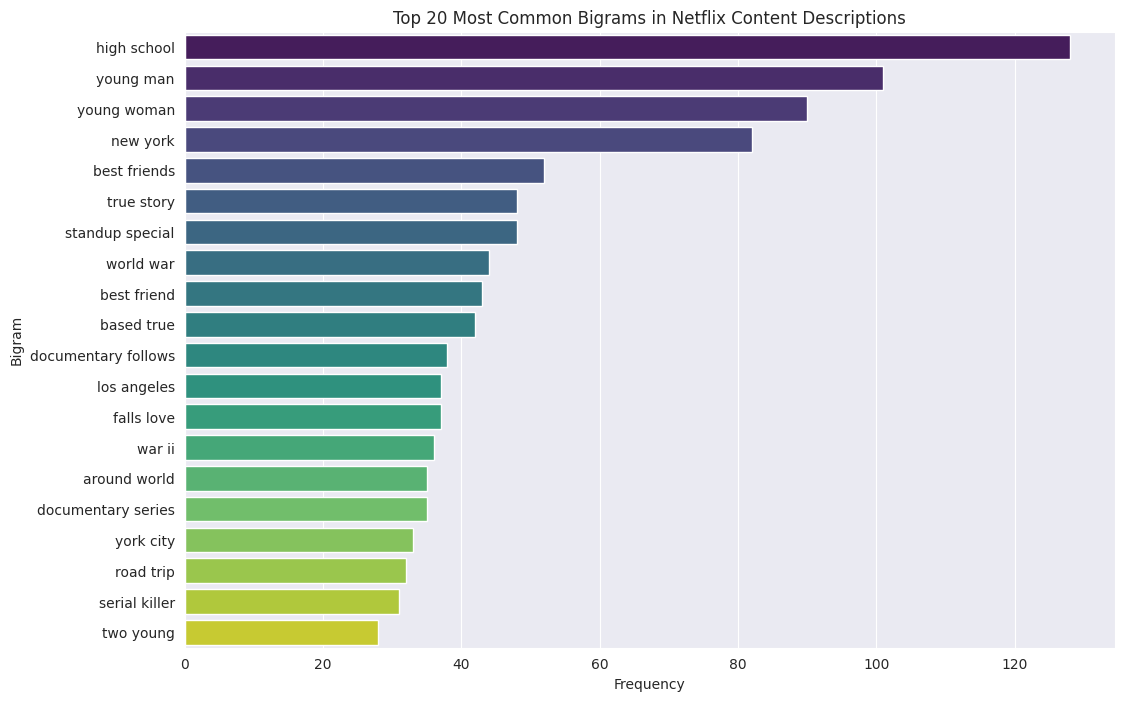

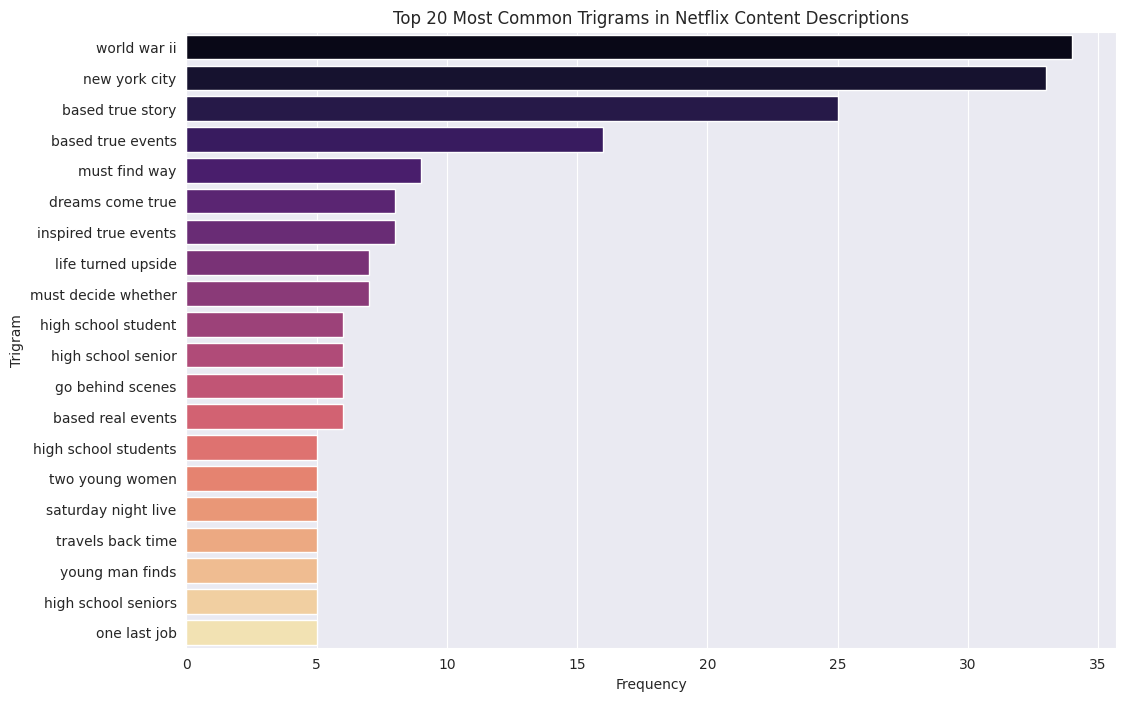

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the list of tuples to a pandas DataFrame for easier plotting
top_bigrams_df = pd.DataFrame(top_bigrams, columns=['Phrase', 'Frequency'])
top_trigrams_df = pd.DataFrame(top_trigrams, columns=['Phrase', 'Frequency'])

# Plotting the top bigrams
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Phrase', data=top_bigrams_df, palette='viridis', hue='Phrase', legend=False)
plt.title('Top 20 Most Common Bigrams in Netflix Content Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

# Plotting the top trigrams
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Phrase', data=top_trigrams_df, palette='magma', hue='Phrase', legend=False)
plt.title('Top 20 Most Common Trigrams in Netflix Content Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

###Insights
The bar plots visualizing the top 20 bigrams and trigrams are now available. We can see phrases like "high school," "young man," and "young woman" are common bigrams, while "world war ii," "new york city," and "based true story" appear frequently as trigrams.

##Q5:Who are the top directors on Netflix?

In [ ]:
# Get the value counts for the 'director' column
director_counts = netflix_df['director'].value_counts()

# Exclude 'Unknown' as it's not a specific director
top_directors = director_counts[director_counts.index != 'Unknown']

# Display the top 10 directors
print("Top 10 Directors on Netflix:")
display(top_directors.head(10))

Top 10 Directors on Netflix:


,count
director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12
Steven Spielberg,10
David Dhawan,9


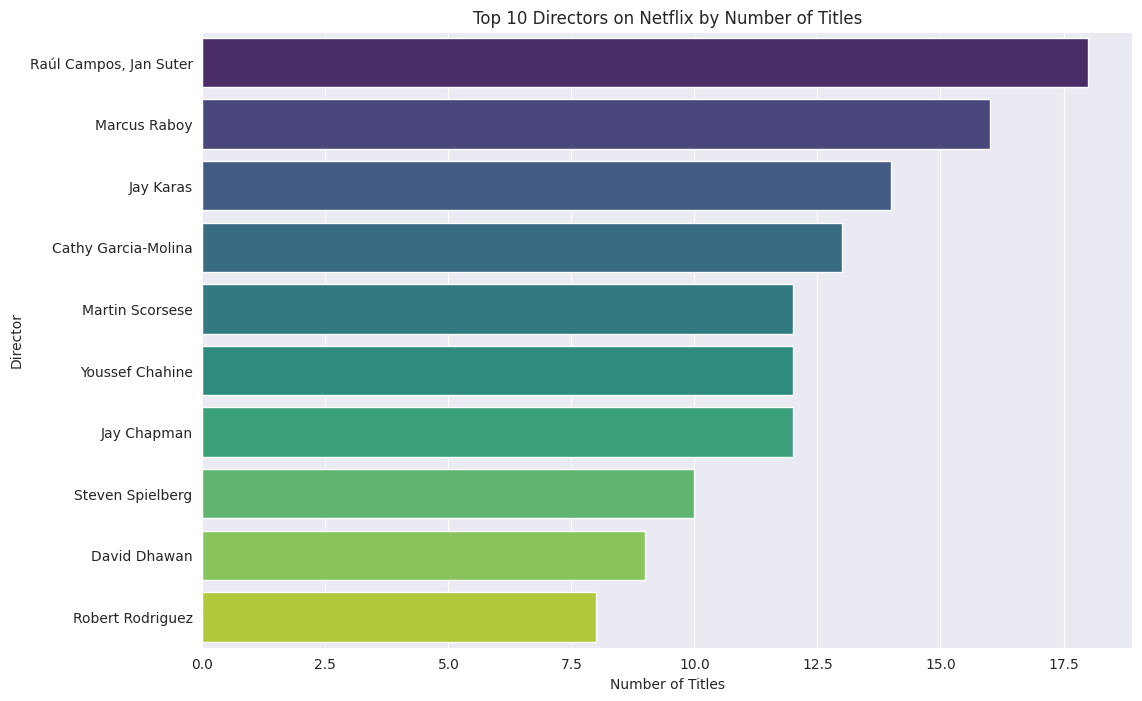

In [ ]:
# Create a bar plot for the top directors
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.head(10).values, y=top_directors.head(10).index, palette='viridis', hue=top_directors.head(10).index, legend=False)
plt.title('Top 10 Directors on Netflix by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

##Insights
#####1 .Leading Directors: The plot clearly shows that Raúl Campos and Jan Suter have the highest number of titles on Netflix among all directors, followed closely by Marcus Raboy.
######2. Prolific Contributors: The directors in the top 10 have a significant number of titles on the platform, indicating their consistent work or the acquisition of a large portion of their filmography by Netflix.
######4. Mix of Directors: The list includes a mix of directors, some of whom are well-known internationally (like Martin Scorsese and Steven Spielberg), and others who might be more prominent in specific regions or genres (like Raúl Campos and Jan Suter, who are known for stand-up comedy specials).